<a href="https://colab.research.google.com/github/mmorari-cmyk/Parcial-1-S-y-S/blob/main/PARCIAL_1_SyS_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOLUCION PARCIAL 1. S y S**
 **Presentado por :** *Marlyn Nathalia Mora Riascos*

# Ejercicio 1

La **distancia media** entre dos señales periódicas $x_1(t)$ y $x_2(t)$, reales o complejas, se puede expresar a partir de la **potencia media de la diferencia** entre ellas:

$$
d^2(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt
$$

Sean $x_1(t)$ y $x_2(t)$ dos señales definidas como:

$$
x_1(t) = A e^{-j n \omega_0 t}
$$

$$
x_2(t) = B e^{j m \omega_0 t}
$$

con

$$
\omega_0 = \frac{2\pi}{T}
$$

donde $T, A, B \in \mathbb{R}^+$ y $n, m \in \mathbb{Z}$.

---

**En el siguiente codigo se muestra la solucion de este ejercicio, desarrollado en python.**

In [20]:
from sympy import * #incluye toda la libreria sympy

# Definición de variables
t, A, B, w0 = symbols('t A B w0', real=True, positive=True)
n, m = symbols('n m', integer=True)
T0 = 2*pi/w0

# Definición de las señales y la diferencoa de x(t)
x1 = A * exp(-I*n*w0*t)
x2 = B * exp(I*m*w0*t)
x_diff = x1 - x2

#|x1 - x2|^2 se simplifica a cosenos.
integrand = simplify(x_diff * conjugate(x_diff))

#Cálculo por casos

# CASO 1: n + m = 0
# Primero sustituimos la condición n+m=0 en el integrando.
integrand_k0 = integrand.subs(n + m, 0)
# Ahora integro
d2_cuando_k_es_cero = (1/T0) * integrate(integrand_k0, (t, 0, T0))


# CASO 2: n + m ≠ 0
# Para cualquier entero k = n+m no nulo, la integral de cos(k*w0*t) sobre un período completo T0 es siempre 0
d2_cuando_k_no_es_cero = (1/T0) * integrate(A**2 + B**2, (t, 0, T0))

# Mostrar los resultados

print("d^2 cuando n+m = 0:")
# Usamos simplify() para simplyficar el resultado
pprint(simplify(d2_cuando_k_es_cero))

print("\nd^2 cuando n+m ≠ 0:")
pprint(d2_cuando_k_no_es_cero)


d^2 cuando n+m = 0:
       2
(A - B) 

d^2 cuando n+m ≠ 0:
 2    2
A  + B 


# Ejercicio 2
Encuentre la señal en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de $5 \text{ kHz}$ y 4 bits de capacidad de representación, aplicado a la señal continua:

$$
x(t) = 3 \cos(1000\pi t) + 5 \sin(3000\pi t) + 10 \cos(11000\pi t)
$$

Realizar la simulación del proceso de discretización (incluyendo al menos tres periodos de $x(t)$). En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


#solucion:
se presenta la solucion en la siguiente celda.

Simulación 1: Conversor de (Fs = 5 kHz)


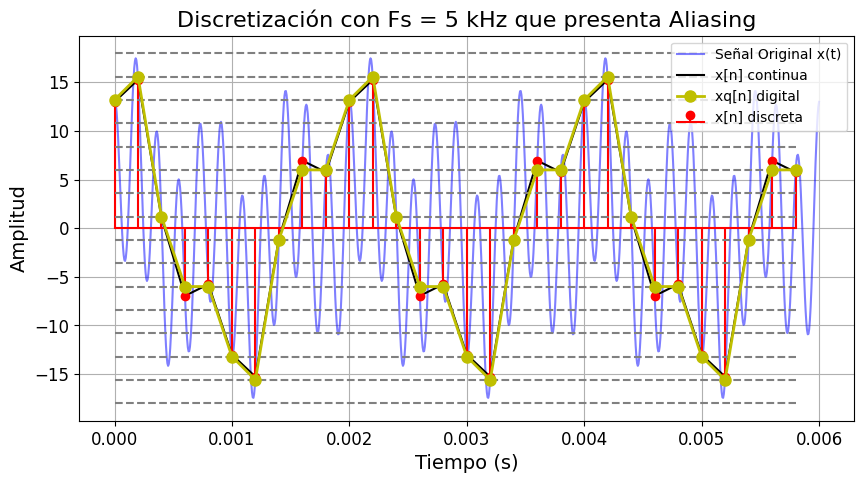


 Simulación 2: Conversor Adecuado (Fs = 12 kHz) 


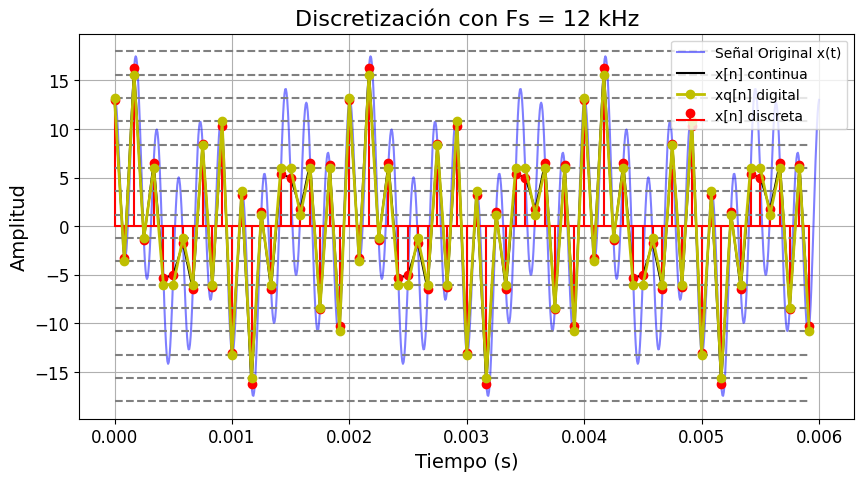

In [21]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Frecuencias de la señal continua en Hz (f = w / 2pi)
f1 = 500
f2 = 1500
f3 = 5500

#La frecuencia fundamental (Fo) es el máximo común divisor para encontrar el periodo
Fo = np.gcd(np.gcd(f1, f2), f3)
To = 1/Fo

# Función que define la señal continua x(t)
def x_t(t):
    return 3 * np.cos(2 * np.pi * f1 * t) + 5 * np.sin(2 * np.pi * f2 * t) + 10 * np.cos(2 * np.pi * f3 * t)

# Función de cuantización
def my_cuantizador(yn, vq): # yn es el punto a cuantizar, vq es el vector de estados
  Ne = vq.shape[0] # Tamaño del vector de estados
  # Reshape asegura que yn sea un vector columna para usar cdist
  dn = cdist(np.array([[yn]]), vq.reshape(-1, 1)) # Calcula la distancia de yn a cada estado
  ind = np.argmin(dn) # Encuentra el nivel as cercano a la muestra
  return vq[ind] # Devuelve el nivel de cuantización más cercano

# Simulación para el Conversor de (Fs = 5kHz)

print("Simulación 1: Conversor de (Fs = 5 kHz)")

Fs_1 = 5000 # Frecuencia de muestreo en Hz
Ts_1 = 1/Fs_1 # Periodo de muestreo
nbits = 4 # Número de bits de cuantización

# Vector de tiempo para tres periodos de la señal
tv_1 = np.arange(0, 3*To, Ts_1)
# Señal muestreada (discretizada en tiempo)
xn_1 = x_t(tv_1)

# Rango y vector de cuantización
rmin = -18 # Amplitud mínima estimada (-3-5-10)
rmax = 18 # Amplitud máxima estimada (3+5+10)
ve = np.linspace(rmin, rmax, 2**nbits) # Vector con los 4 bits


#recorrer vector cero y spam discretizado para cuantizar
for i in range(xn_1.shape[0]): # Recorrer cada muestra de la señal discretizada
   if i==0: #primera muestra
     xq_1 = my_cuantizador(xn_1[i], ve)
   else: # Para las otras muestras
     xq_1 = np.append(xq_1, my_cuantizador(xn_1[i], ve)) #se.al cuantizada

#Gráfica para el Conversor de (Fs = 5kHz)
plt.figure(figsize=(10, 5)) # Define el tamaño de la figura
plt.title('Discretización con Fs = 5 kHz que presenta Aliasing', fontsize=16) # Título

# Vector de tiempo graficar la señal continua de fondo
t_continuo = np.linspace(0, 3*To, 1000)
# Graficar la señal original
plt.plot(t_continuo, x_t(t_continuo), color='b', alpha=0.5, label='Señal Original x(t)')

# Graficar la señal muestreada como una línea continua
plt.plot(tv_1, xn_1, c='k', label='x[n] continua') # Señal continua muestreada
# Graficar la señal muestreada con stem
plt.stem(tv_1, xn_1, linefmt='r-', markerfmt='ro', basefmt='r-', label='x[n] discreta') # Señal muestreada discreta

# Graficar los estados de cuantización
for v in ve: # Recorre cada nivel de cuantización
  plt.plot(tv_1, v*np.ones(len(tv_1)), 'gray', linestyle='--') # hace una línea horizontal

# Graficar la señal digital final
plt.plot(tv_1, xq_1, c='y', marker='o', label='xq[n] digital', linewidth=2, markersize=8)

plt.legend() # Muestra las etiquetas
plt.grid(True) # Activa la cuadrícula
plt.xlabel('Tiempo (s)') # Etiqueta del eje X
plt.ylabel('Amplitud') # Etiqueta del eje Y
plt.show() # Muestra el gráfico

# Simulación con Conversor Fs = 12kHz sin aliasing

print("\n Simulación 2: Conversor Adecuado (Fs = 12 kHz) ")

Fs_2 = 12000 # Nueva Fs > 11 kHz
Ts_2 = 1/Fs_2 # Nuevo periodo de muestreo

# Vector de tiempo para tres periodos con la nueva Fs
tv_2 = np.arange(0, 3*To, Ts_2)
# Señal muestreada con la nueva Fs
xn_2 = x_t(tv_2)

# Cuantización (se usan los mismos 4 bits y vector de estados 've')
for i in range(xn_2.shape[0]): # Recorrer cada muestra
   if i==0: # Primera muestra
     xq_2 = my_cuantizador(xn_2[i], ve) # Inicia el vector de la señal cuantizada
   else:
     xq_2 = np.append(xq_2, my_cuantizador(xn_2[i], ve))

# Gráfica
plt.figure(figsize=(10, 5))
plt.title('Discretización con Fs = 12 kHz', fontsize=16) # Título

# Graficar la señal original continua
plt.plot(t_continuo, x_t(t_continuo), color='b', alpha=0.5, label='Señal Original x(t)')

# Graficar la señal muestreada continua y discreta
plt.plot(tv_2, xn_2, c='k', label='x[n] continua') # Muestreada continua
plt.stem(tv_2, xn_2, linefmt='r-', markerfmt='ro', basefmt='r-', label='x[n] discreta') # Muestreada discreta

# Graficar los estados de cuantización
for v in ve:
  plt.plot(tv_2, v*np.ones(len(tv_2)), 'gray', linestyle='--')

# Graficar la señal digital final
plt.plot(tv_2, xq_2, c='y', marker='o', label='xq[n] digital', linewidth=2)

plt.legend() # Muestra las etiquetas
plt.grid(True) # Activa la cuadrícula
plt.xlabel('Tiempo (s)') # Etiqueta del eje X
plt.ylabel('Amplitud') # Etiqueta del eje Y
plt.show() # Muestra el gráfico


#Ejercicio 4.
Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para $n \in \{0, \pm 1, \pm 2, \pm 3, \pm 4, \pm 5\}$, a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente las simulaciones de Python respectivas.

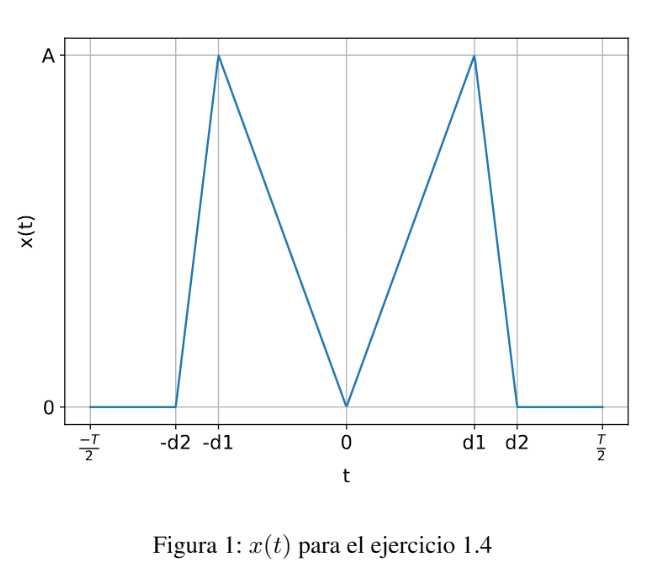

#la solucion se presenta en la siguiente celda.


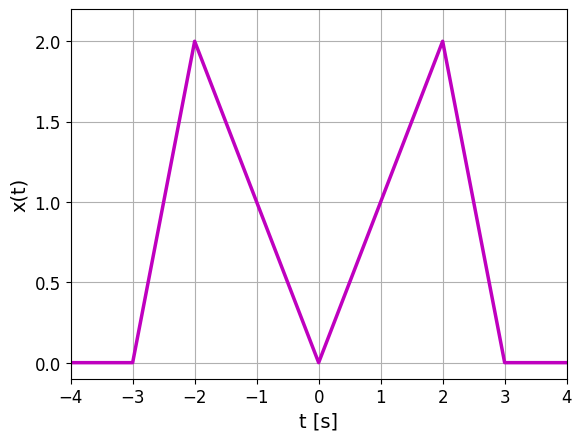

In [22]:
# Para graficar
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


A = 2.0     # Amplitud de la señal
T = 8.0     # Período de la señal
d1 = 2.0   # Punto de quiebre interior
d2 = 3.0    # Punto de quiebre exterior


Fs = 200    # Frecuencia de muestreo
tv = np.arange(-T/2, T/2, 1/Fs) # Vector de tiempo p
Nm = len(tv) # Número de muestras

# se crea la señal
# Inicializamos la señal como un vector de ceros
xo = np.zeros_like(tv)

# Calculamos la pendiente
m1 = A / d1 # Pendiente recta ascendente
m2 = - A / (d2 - d1)     # Pendiente de la recta descendente, por eso es negativa

# Aplicamos la ecuación de la recta para cada segmento
# y(t)=y+m*(t - t_inicial) pero solo para [-d2, -d1]. Pasa por (-d2, 0) y [d1, d2]. Pasa por (d2, 0).

# Define los limites
lim1 = (tv >= -d2) & (tv <= -d1)
lim2 = (tv > -d1) & (tv <= 0)
lim3 = (tv >= 0) & (tv < d1)
lim4 = (tv >= d1) & (tv <= d2)


# Rampa ascendente exterior: t en [-d2, -d1]. Pasa por (-d2, 0).
xo[lim1] = -m2 * (tv[lim1] + d2)

# Rampa descendente interior: t en [-d1, 0]. Pasa por (0, 0).
xo[lim2] = -m1 * tv[lim2]

# Rampa ascendente interior: t en [0, d1]. Pasa por (0, 0).
xo[lim3] = m1 * tv[lim3]

# Rampa descendente exterior: t en [d1, d2]. Pasa por (d2, 0).
xo[lim4] = m2 * (tv[lim4] - d2)

# Graficar
plt.plot(tv, xo, 'm', linewidth=2.5) # Color y grosor de línea
plt.grid(True)
plt.xlabel("t [s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
# Ajustamos los límites para que se parezca más a la imagen original
plt.ylim(-0.1, A + 0.2)
plt.xlim(-T/2, T/2)
plt.show()

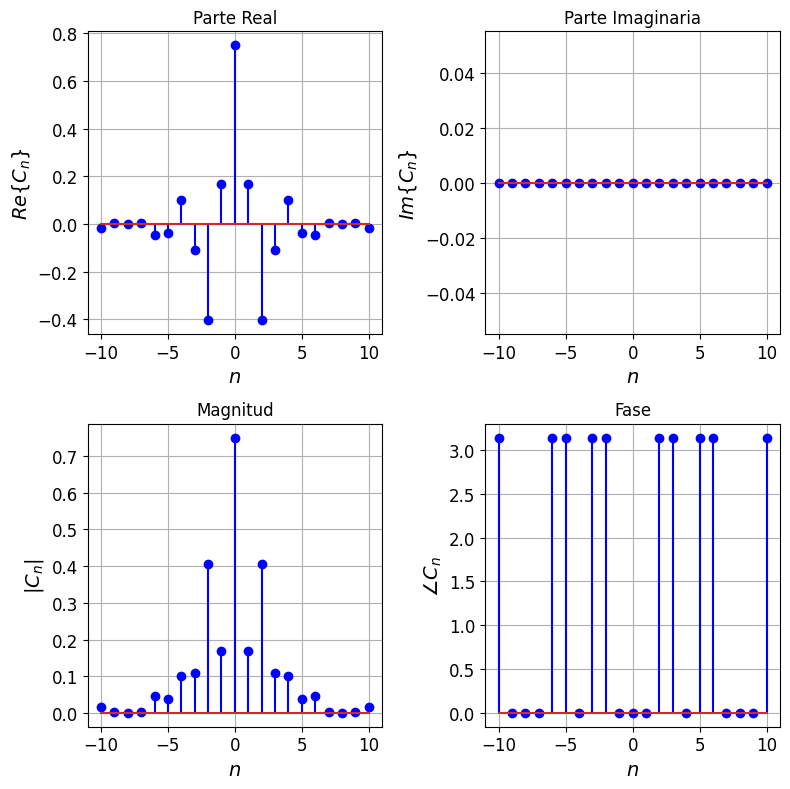

In [23]:
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro
cn = np.zeros(2*N+1,dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos

# reemplazo temporalmente el 0 en el denominador.
nv_no_cero = nv.copy()
idx_cero = N # donde n=0
nv_no_cero[idx_cero] = 1.0 # Evita el error de división por cero

#  Cn = (AT / (2π²n²)) * [ (1/d₁ + 1/(d₂ - d₁)) * cos(nω₀d₁) - cos(nω₀*d₂) / (d₂ - d₁) - 1/d₁ ]  y  w0T=2pi
factor_comun = (A * T) / (2 * (np.pi**2) * (nv_no_cero**2))
termino1 = (1/d1 + 1/(d2 - d1)) * np.cos(nv_no_cero * wo * d1)
termino2 = np.cos(nv_no_cero * wo * d2) / (d2 - d1)
termino3 = 1 / d1

# Se calculan todos los coeficientes pero el de n=0 es incorrecto
cn = factor_comun * (termino1 - termino2 - termino3)

# se calcular el coeficiente para n = 0
cn[idx_cero] = (A * d2) / T

#graficar espectro

fig = plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'b')
plt.title('Parte Real')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'b')
plt.title('Parte Imaginaria')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'b')#magnitud del espectro #
plt.title('Magnitud')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid(True)

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'b')#fase del espectro
plt.title('Fase')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\angle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid(True)

fig.tight_layout()
plt.show()

In [24]:
from ipywidgets import interact, IntSlider
# Px = (1/T) * ∫[-T/2, T/2] x²(t) dt = (2*A²*d₂) / (3*T)
Px = (2 * A**2 * d2) / (3 * T)

def pltest(Na=1):
    ind = np.arange(N-Na, N+Na+1) #función que recibe Na = número de armónicos a usar a cada lado (±𝑛)

    potencia_reconstruida = np.sum(abs(cn[ind])**2)
    if ind[0] == 0: # Caso donde incluimos n=0
        potencia_reconstruida -= abs(cn[N])**2 # Restamos el DC

    er = 1 - (abs(cn[N])**2 + 2*potencia_reconstruida)/Px  #Calcula el error relativo de reconstrucción

    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind]) # dot calcula el producto entre vectores

    plt.figure(figsize=(10,6)) # Hago la figura más grande
    plt.plot(tv,xe.real,color='b',label='$x_e(t)$') # Usamos .real por si hay ruido numérico
    plt.plot(tv,xo,color='r', alpha=0.7, label='x(t)') #señal original con transparencia
    plt.title('$E_r$ para %d armónicos = %.2f%%' % (Na, 100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return

# Se llama a la función
interact(pltest, Na=IntSlider(min=0, max=N, step=1, value=1, description='Armónicos (Na)'));

interactive(children=(IntSlider(value=1, description='Armónicos (Na)', max=10), Output()), _dom_classes=('widg…

In [25]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#Animación Completa y Detallada de la Reconstrucción

# Crea la figura y los ejes
fig_anim_full, ax = plt.subplots(2, 2, figsize=(8, 6))
gs = ax[0, 0].get_gridspec()
for a in ax[1, :]: a.remove() # Elimina los dos ejes inferiores
ax_bottom = fig_anim_full.add_subplot(gs[1, :])

#Función que se ejecuta para dibujar cada cuadro
def update_full_animation(Na): # 'Na' es el número de armónicos a usar en el cuadro actual.
    # Limpia los ejes para dibujar el nuevo cuadro.
    ax[0, 0].clear(); ax[0, 1].clear(); ax_bottom.clear()

    # Espectro
    ind = np.arange(N - Na, N + Na + 1) # Selecciona los índices de los armónicos a usar.
    ax[0, 0].stem(nv, np.abs(cn), linefmt='b-', markerfmt='bo', basefmt=' ', label='No usados') # Dibuja el espectro completo.
    ax[0, 0].stem(nv[ind], np.abs(cn[ind]), linefmt='r-', markerfmt='ro', basefmt=' ', label='Usados') # Resalta los armónicos activos.
    ax[0, 0].set_title('Magnitud del Espectro')
    ax[0, 0].grid(True); ax[0, 0].legend()

    #Componentes Espectrales
    ce = phin[:, ind] * cn[ind] # Calcula cada componente individual: cn * e^(jnωt).
    ax[0, 1].plot(tv, np.real(ce)) # Dibuja la parte real de dichos componentes.
    ax[0, 1].set_title('Componentes Reales')
    ax[0, 1].grid(True)

    # Reconstrucción y Error
    xe = phin[:, ind].dot(cn[ind]) # Suma los componentes para reconstruir la señal (xe).
    et = xo - np.real(xe) # Calcula la señal de error
    Pc_sum = np.sum(np.abs(cn[ind])**2) # Calcula la potencia de los armónicos usados.
    er = (1 - Pc_sum / Px) * 100 if Px > 0 else 0 # Calcula el error porcentual de la reconstrucción.

    ax_bottom.plot(tv, xo, 'r', linewidth=2, label='$x(t)$ (Original)') # Dibuja la señal original.
    ax_bottom.plot(tv, np.real(xe), 'b', label=r'$\hat{x}(t)$ (Reconstruida)') # Dibuja la señal reconstruida.
    ax_bottom.plot(tv, et, 'g', alpha=0.7, label='$e(t)$ (Error)') # Dibuja la señal de error.
    ax_bottom.set_title(f'Error Relativo = {er:.2f}% con $N_a = {Na}$ armónicos')
    ax_bottom.legend(loc='upper right'); ax_bottom.grid(True)
    ax_bottom.set_ylim(-0.2, A + 0.2) # Fija los límites del eje Y.

    fig_anim_full.tight_layout() # Ajusta el espaciado
# se crea y se visualiza la animación

anim_full = FuncAnimation(fig_anim_full, update_full_animation, frames=range(N + 1), blit=False, interval=400) # Llama a la función 'update_full_animation' para cada cuadro, desde 0 hasta N armónicos.

plt.close(fig_anim_full)# evita que se muestre dos veces.

HTML(anim_full.to_jshtml())